In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../") 

In [4]:
from algos.nested import *
from algos.greedy import *
from algos.random_order import *
from algos.uct import *
from utils import *
from base import *

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
filename = "../data/c_memorable_moments.txt"

In [77]:
sol = UCT(filename, max_slides=50, max_candidates=3)
slideshow = sol.run(30, 0.01)

1000 photos caught.
func:'form_slides' took: 0.0000 sec
Num slides : 750
Score : 20


In [80]:
def get_score(ss_idx):
    ss = Slideshow()
    [ss.add_right(SLIDES[s]) for s in ss_idx]
    return sum(ss.scores)

@timeit
def mean_scores(c, sol):
    scores = []
    for i in range(10):
        ss = sol.run(30, c, verbose=0)
        score = np.sum(ss.scores)
        scores.append(score)
    return np.mean(scores), scores

sol = UCT(filename, max_slides=50, max_candidates=3)
hist = []
for c in np.arange(2, 5, 0.2):
    score, h = mean_scores(0.1, sol)
    print(c, score)
    hist.append([c, score, h])
hist = np.array(hist)

1000 photos caught.
func:'form_slides' took: 0.0021 sec
Num slides : 750
func:'mean_scores' took: 23.2791 sec
2.0 18.4
func:'mean_scores' took: 20.6063 sec
2.2 17.1
func:'mean_scores' took: 21.3014 sec
2.4000000000000004 18.1
func:'mean_scores' took: 20.2434 sec
2.6000000000000005 18.2
func:'mean_scores' took: 23.2308 sec
2.8000000000000007 18.8
func:'mean_scores' took: 27.4917 sec
3.000000000000001 18.4
func:'mean_scores' took: 27.7517 sec
3.200000000000001 19.8
func:'mean_scores' took: 20.1111 sec
3.4000000000000012 18.4
func:'mean_scores' took: 20.2360 sec
3.6000000000000014 19.4
func:'mean_scores' took: 20.8163 sec
3.8000000000000016 16.7
func:'mean_scores' took: 19.5209 sec
4.000000000000002 18.2
func:'mean_scores' took: 20.5564 sec
4.200000000000002 18.0
func:'mean_scores' took: 26.4710 sec
4.400000000000002 18.3
func:'mean_scores' took: 22.8309 sec
4.600000000000002 17.1
func:'mean_scores' took: 22.8465 sec
4.8000000000000025 17.7


<ipython-input-80-beb996eaed46>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  hist = np.array(hist)


Text(0.5, 0, 'Constant c')

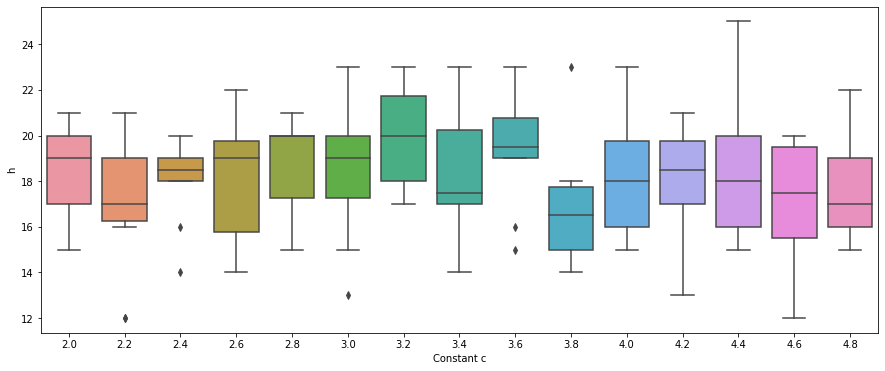

In [86]:
df = pd.DataFrame(hist, columns=['c', 'score', 'h']).explode('h')
df['c'] = df.c.apply(lambda x: round(x, 1))

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

sns.boxplot(data=df, x='c', y='h', ax=ax)
ax.set_xlabel('Constant c')

In [119]:
df

,index,c,score,h
0,0,2.0,18.4,"[19, 20, 15, 20, 17, 15, 19, 21, 17, 21]"
2,2,2.4,18.1,"[19, 16, 20, 18, 14, 19, 18, 18, 19, 20]"
4,4,2.8,18.8,"[21, 21, 20, 20, 15, 20, 18, 16, 17, 20]"
6,6,3.2,19.8,"[17, 22, 18, 17, 18, 19, 22, 21, 23, 21]"
8,8,3.6,19.4,"[16, 15, 19, 19, 19, 23, 22, 20, 20, 21]"
10,10,4.0,18.2,"[16, 18, 16, 19, 15, 20, 18, 23, 22, 15]"
12,12,4.4,18.3,"[16, 25, 17, 20, 15, 19, 15, 20, 16, 20]"
14,14,4.8,17.7,"[19, 16, 19, 16, 16, 22, 15, 20, 17, 17]"


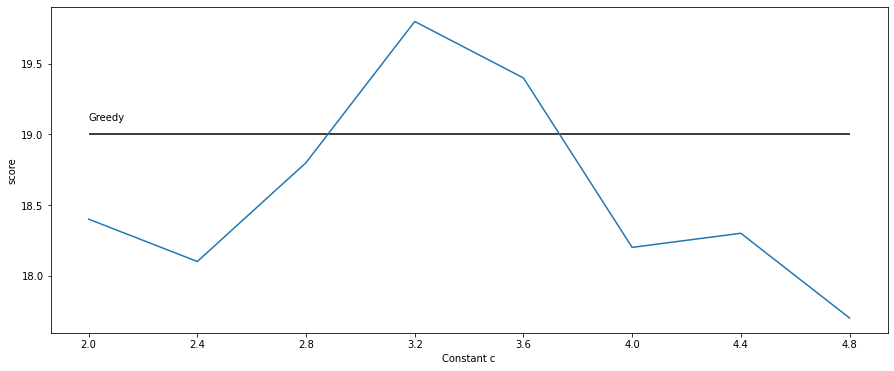

In [126]:
df = pd.DataFrame(hist, columns=['c', 'score', 'h']).reset_index().query("index % 2 == 0")
df['c'] = df.c.apply(lambda x: round(x, 1))
df['score'] = df.score.apply(lambda x: float(x))

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

ax.hlines(19., 2, 4.8, color='black')
ax.text(2, 19.1, 'Greedy')

sns.lineplot(data=df, x='c', y='score', ax=ax)
ax.set_xlabel('Constant c')
ax.set_xticks(np.arange(2, 5, 0.4))
ax.set_xticklabels(df.c);